# Fokker-Planck equation using `sage`

We will attempt to resolve (indirectly) the Fokker-Planck equation of the total wealth (see BM2000) using sage.

## Reminder of the problem

Let $w_i$ be $N$ stochastic processes simulating the wealth of $N$ individuals trading.
The trading process is implemented with the following SDEs :
$$\dfrac{\mathrm{d}w_i}{\mathrm{d}t} = (\eta_i - m - \sigma^2)w_i + J(1-w_i) \qquad \forall \, i \in \lbrace 0, 1, ..., N-1 \rbrace$$
where $\eta_i : t \mapsto \eta_i(t)$ is a gaussian white noise of mean $m$ and variance $2\sigma^2$.

These $N$ independent SDEs yield the following Fokker-Planck equations for their probability distribution function $p : w,t \mapsto p(w,t)$ :
$$\dfrac{\partial p}{\partial t} = \dfrac{\partial}{\partial w} \big[J(w-1) + \sigma^2w)p\big] + \sigma^2\dfrac{\partial}{\partial w} \left[w\dfrac{\partial}{\partial w} \big(wp\big) \right]$$
This equation is a second order partial differential equation.
The initial condition can be of the form $p(w,0) = \delta(1)$ and the boundary condition writes :
$$\forall \, t > 0, \qquad \int_{\mathbb{R}}p(w,t) \mathrm{d}w = 1$$
and
$$\forall \, t > 0, w \in \mathbb{R}, \qquad p(w,t) > 0$$

## Solving

We can re-write this equation as :
$$\dfrac{\partial p}{\partial t} = (J + 2\sigma^2)p + \big[J(w-1) + 4\sigma^2 w\big]\dfrac{\partial p}{\partial w} + \sigma^2 w^2 \dfrac{\partial^2 p}{\partial^2 w}$$

### Separable solution
If we look for a solution of the form $p(w,t) = A(w)B(t)$ we can write :
$$B' - C_0 \times B = 0$$
and
$$(J+2\sigma^2 - C_0)A + \big[J(w-1) + 4\sigma^2 w\big]A' + \sigma^2 w^2 A'' = 0$$

This yields the system :
$$\dfrac{\mathrm{d}}{\mathrm{d}w} \left[ \begin{array}{c} A \\ A' \end{array} \right] = \left[ \begin{array}{cc} 0 & 1 \\ -(J+2\sigma^2-C_0)/(\sigma w)^2 & -(J(w-1) + 4\sigma^2 w)/(\sigma w)^2 \end{array} \right] \left[ \begin{array}{c} A \\ A' \end{array} \right]$$

Problem yet :
- this is equivalent to multiplying the stationnary solution (known, *c.f.* [01]) by an exponential term. No information is really added,
- this scheme cannot enforce both the initial condition and the boundary consitions,
- ...

In [48]:
"""tries to calcutate the stationnary density of probability of the individual wealth
this version works"""

from sage.calculus.desolvers import desolve_system_rk4

J = 1
sigm = 1

w = var('w')

# version 1 (FAIL)
#A = function('A')(w)
#dA = diff(A, w, 1)
# version 2
A = var('A')
dA = var('dA')

C = 0.5

"""
writing the system for A, dA :
dA/dw    =                             0*A +                     1*dA
d(dA)/dw = -1/(sigm*w)^2*((J+2*sigm^2-C)*A + (J(1-w) + 4*sigm^2*w)*dA)
"""
r1 = dA
r2= -1/(sigm*w)^2*((J+2*sigm^2-C)*A + (J*(1-w) + 4*sigm^2*w)*dA)

sol = desolve_system_rk4([r1,r2],[A,dA],ics=[10,0.3,-0.1],ivar=w,end_points=1)

# plot opt 1
Q=[[i,j] for i,j,k in sol]
LP=list_plot(Q)

# plot opt 2
#Q=[[j,k] for i,j,k in sol]
#sage: LP=list_plot(Q)

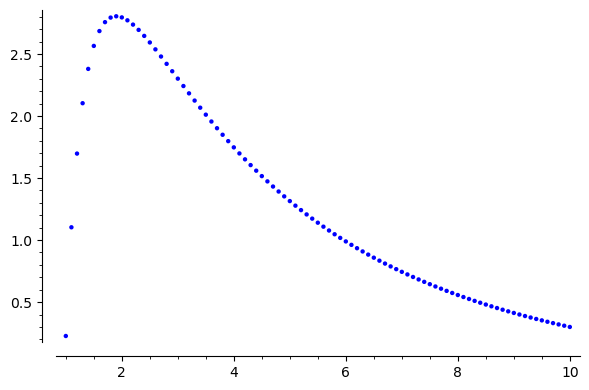

In [49]:
plot(LP)

## Reference

[1] Bouchaud, J.-P., & Me ́zard, M. (2000). Whealth condensation in a simple statistical model of economy. Physica A: Statistical Mechanics and its Applications, 282, 536–545.